# Test of envelope mass defect consolidation

Showing examples of the implementation of an algorithm to consolidate isotope mass defects in a theoretical isotopic envelope.

In [7]:
import sys
import matplotlib.pyplot as plt
import pandas as pd

#import my modules
sys.path.append('/Users/Aaron/local/envFinder/envFinder')

import atom_table
import main

def plotEnv(ax, env):
    ax.stem([x[0] for x in env], [x[1] for x in env], markerfmt=' ')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for x, y in env:
        if y > 0.01:
            ax.annotate('{}'.format(round(x, 4)), xy=(x, y))
    return ax

def drawMassDefectExample():
    # done once
    pepStats = main.read_pep_stats('/Volumes/Data/msData/ms2_anotator/citFinder/rorpad_mouse/peptide_cit_stats.tsv')
    
    #right now only draw a plot for 1 peptide
    pepStats = pepStats[pepStats['precursor_scan'] == 8468]

    # done once
    atomTableFname = '/Users/Aaron/local/envFinder/db/atom_tables/cit_diff_mod_atoms.txt'
    atomTable = atom_table.AtomTable(atomTableFname)
    if not atomTable.read():
        exit()

    nRow = len(pepStats.index)
    for i, row in pepStats.iterrows():
        print('Working on {} of {}'.format(i, nRow))

        c = atomTable.getComposition(row['sequence'], row['charge'])
        env1 = atom_table.getEnvelope(c)
        env2 = atom_table.getEnvelope(c, combineDefects = False)

        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
        ax1 = plotEnv(ax1, env1)
        ax2 = plotEnv(ax2, env2)

        ax1.set_title('Consolidated mass defects')
        ax2.set_title('All mass defects')

        ax2.set_xlabel('m/z')
        ax1.set_ylabel('fraction')
        ax2.set_ylabel('fraction')
        

Working on 5 of 1


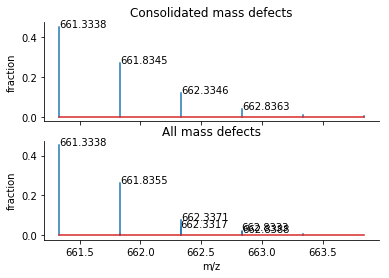

In [9]:
drawMassDefectExample()

plt.savefig('/Users/Aaron/local/envFinder/testFiles/envelope_mass_defect_consolidation.pdf')